In [170]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [171]:
team_win_pct_2024 = {
    'Nyk': 0.633,
    'Bos': 0.747,
    'Cle': 0.797,
    'Ind': 0.608,
    'Mil': 0.570,
    'Det': 0.544,
    'Orl': 0.494,
    'Atl': 0.468,
    'Chi': 0.456,
    'Mia': 0.456,
    'Tor': 0.367,
    'Bro': 0.329,
    'Phi': 0.291,
    'Cha': 0.241,
    'Was': 0.215,
    
    'Okc': 0.823,
    'Hou': 0.658,
    'Lal': 0.608,
    'Lac': 0.595,
    'Den': 0.595,
    'Gol': 0.595,
    'Min': 0.582,
    'Mem': 0.595,
    'Dal': 0.481,
    'Sac': 0.494,
    'Pho': 0.443,
    'Por': 0.443,
    'San': 0.405,
    'Nor': 0.266,
    'Uta': 0.203,
}
team_win_pct_2023 = {
    'Nyk': 0.610,
    'Bos': 0.780,
    'Cle': 0.585,
    'Ind': 0.573,
    'Mil': 0.598,
    'Det': 0.171,
    'Orl': 0.573,
    'Atl': 0.439,
    'Chi': 0.476,
    'Mia': 0.561,
    'Tor': 0.305,
    'Bro': 0.390,
    'Phi': 0.573,
    'Cha': 0.256,
    'Was': 0.183,
    
    'Okc': 0.695,
    'Hou': 0.500,
    'Lal': 0.573,
    'Lac': 0.622,
    'Den': 0.695,
    'Gol': 0.561,
    'Min': 0.683,
    'Mem': 0.329,
    'Dal': 0.610,
    'Sac': 0.561,
    'Pho': 0.598,
    'Por': 0.256,
    'San': 0.268,
    'Nor': 0.598,
    'Uta': 0.378,
}
team_win_pct_2022 = {
    'Nyk': 0.573,
    'Bos': 0.695,
    'Cle': 0.622,
    'Ind': 0.427,
    'Mil': 0.707,
    'Det': 0.207,
    'Orl': 0.415,
    'Atl': 0.500,
    'Chi': 0.488,
    'Mia': 0.537,
    'Tor': 0.500,
    'Bro': 0.549,
    'Phi': 0.659,
    'Cha': 0.329,
    'Was': 0.427,
    
    'Okc': 0.488,
    'Hou': 0.268,
    'Lal': 0.524,
    'Lac': 0.537,
    'Den': 0.646,
    'Gol': 0.537,
    'Min': 0.512,
    'Mem': 0.622,
    'Dal': 0.463,
    'Sac': 0.585,
    'Pho': 0.549,
    'Por': 0.402,
    'San': 0.268,
    'Nor': 0.512,
    'Uta': 0.451,
}

players_2022 = pd.read_csv('2022.csv')
players_2023 = pd.read_csv('2023.csv')
players_2024 = pd.read_csv('2024.csv')

# Drop the 'Temp' column from each DataFrame in place
players_2022.drop(columns=['Temp'], inplace=True, errors='ignore')
players_2023.drop(columns=['Temp'], inplace=True, errors='ignore')
players_2024.drop(columns=['Temp'], inplace=True, errors='ignore')

# Save the updated DataFrames back to the same files
players_2022.to_csv('2022.csv', index=False)
players_2023.to_csv('2023.csv', index=False)
players_2024.to_csv('2024.csv', index=False)

player_files = ['2022.csv', '2023.csv', '2024.csv']

# Loop through each player file
for player_file in player_files:
    # Load player data
    players = pd.read_csv(player_file)
    # Get correct year correlation
    if player_file == '2022.csv':
        win_pct = team_win_pct_2022
    elif player_file == '2023.csv':
        win_pct = team_win_pct_2023
    else:
        win_pct = team_win_pct_2024

    # Map win percentage to teams
    players['win'] = players['TEAM'].map(win_pct)

    # Save the updated player data with the 'win' column
    players.to_csv(f'{player_file}', index=False)

In [172]:
# Get all CSV files
csv_files = glob.glob('./*.csv')

# Read the first file with header
df_main = pd.read_csv(csv_files[0])

# Read through data sets, dropping empty datapoitns
other_dfs = []
for f in csv_files[1:]:
    df = pd.read_csv(f, header=None, skiprows=1, names=df_main.columns)
    df = df.dropna(how='all', axis=1)
    df = df.dropna(how='all')
    other_dfs.append(df)

#Combine data sets
df_combined = pd.concat([df_main] + other_dfs, ignore_index=True)

#Only 600 players
df_combined = df_combined.head(600)
#Save to CSV
df_combined.to_csv('combined_clean.csv', index=False)

In [173]:
#Read df into pandas
df = pd.read_csv('combined_clean.csv')
#Drop the rank column as its irrelevant
df = df.drop(columns='RANK')
df= df.drop(columns="AGE")


In [ ]:
#Data cleaning
#There was error in the input of games played for 2023. We will clean
#the columns in the other two years, sorting out players with <20 games
#and then delete the column fully

mask = (df['GP']<20) & ~df.index.to_series().between(200,401)

df_cleaned = df[~mask]
df = df_cleaned
df = df.drop(columns="GP")

df= df[df['MPG'] >= 20]

print(df.shape[0])



574


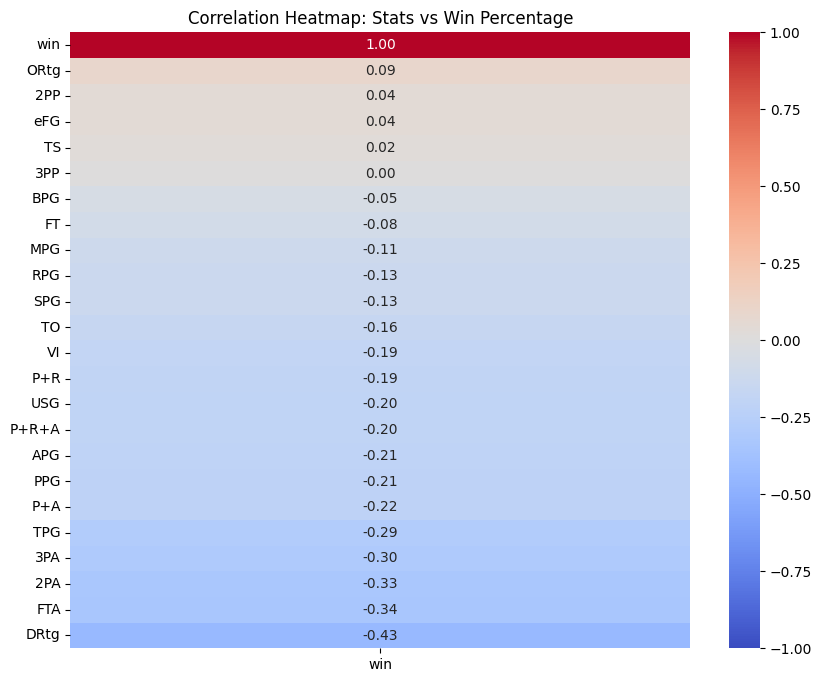

In [184]:
#Get numeric columns
numeric = df.select_dtypes(include = ['number']).columns

#Create correlations to win percentagle
correlations = df[numeric].corr(method='spearman')['win'].sort_values(ascending=False).to_frame()


# Plot a heatmap showing the correlation of each stat with 'win'
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation Heatmap: Stats vs Win Percentage")
plt.show()